In [1]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
users = 100
p_login = 0.2
p_logout = 0.5
N=10000

In [19]:
def sim_states(users, p_login, N):
    log_status=[0]*users
    states=np.zeros(users)
    state=0
    max_pis = [list() for i in range(5)]
    max_pis_ind = [19,20,21,22,23]
    for i in range(N):
        p_logout = 1 - (0.008 * state + 0.1)
        for j in range(users):
            u=random.random()
            if(log_status[j]==0):
                if(u<p_login):
                    state+=1
                    log_status[j]=1
            else:
                if(u<p_logout):
                    state-=1
                    log_status[j]=0
        for k in range(len(max_pis_ind)):
            max_pis[k].append(states[max_pis_ind[k]]/(i+1))
        states[state]+=1
    states = states/N
    return states, max_pis

In [20]:
states, max_pis = sim_states(users, p_login, N)

In [21]:
print(states)
ind = np.argpartition(states, -5)[-5:]
print(ind)
print(states[ind])

[0.     0.     0.     0.     0.     0.     0.     0.0002 0.     0.0007
 0.0014 0.0029 0.0051 0.0099 0.0186 0.0283 0.0368 0.0506 0.064  0.0787
 0.0859 0.0977 0.0954 0.0854 0.0756 0.0682 0.0564 0.0403 0.0356 0.0257
 0.0143 0.0092 0.0053 0.0037 0.0022 0.0011 0.0005 0.0001 0.     0.0002
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
[19 23 20 21 22]
[0.0787 0.0854 0.0859 0.0977 0.0954]


Text(0, 0.5, 'PI')

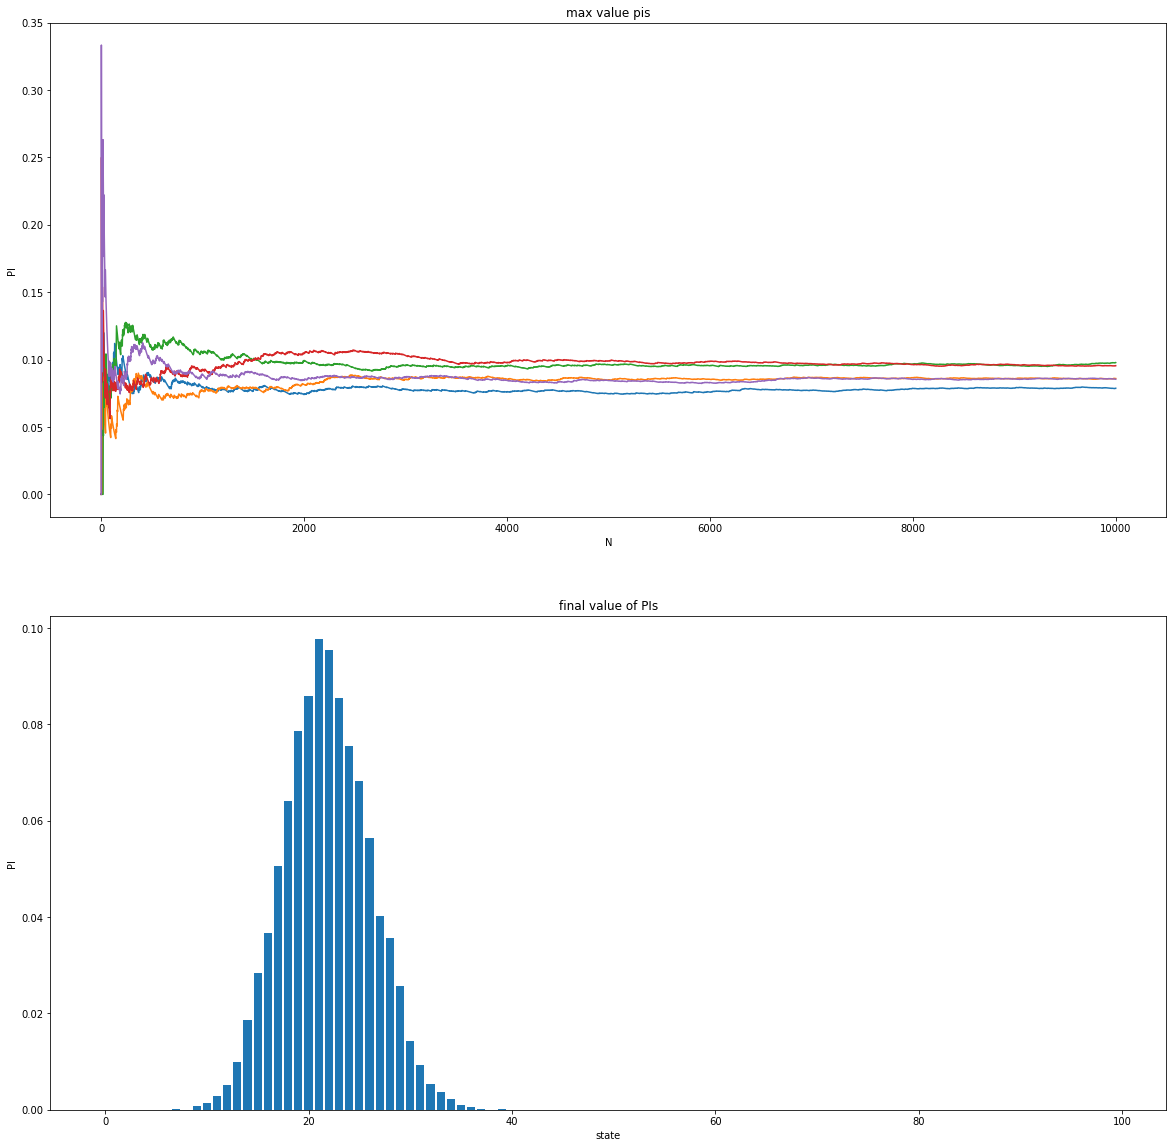

In [22]:
fig,ax = plt.subplots(2,figsize=(20,20))
for i in range(len(max_pis)):
    ax[0].plot(range(N),max_pis[i])
    ax[0].set_title('max value pis')
    ax[0].set_xlabel('N')
    ax[0].set_ylabel('PI')
    
ax[1].bar(range(users),states.tolist())
ax[1].set_title('final value of PIs')
ax[1].set_xlabel('state')
ax[1].set_ylabel('PI')